In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
df = pd.read_csv('50_startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


[]

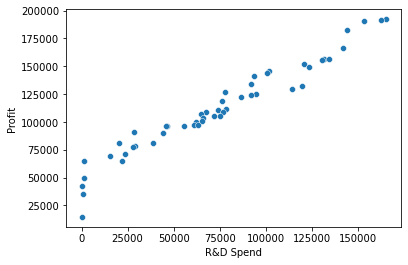

In [4]:
sns.scatterplot(data=df,x='R&D Spend',y='Profit')
plt.plot()

In [5]:
#for admin and marketing also

In [6]:
df['State'].value_counts() #nominal catagory

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [7]:
df1=pd.get_dummies(df['State'],drop_first=True)

In [8]:
df=pd.concat([df,df1],axis=1)

In [9]:
df=df.drop(['State'],axis=1)

In [10]:
df

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0
5,131876.90,99814.71,362861.36,156991.12,0,1
6,134615.46,147198.87,127716.82,156122.51,0,0
7,130298.13,145530.06,323876.68,155752.60,1,0
8,120542.52,148718.95,311613.29,152211.77,0,1
9,123334.88,108679.17,304981.62,149759.96,0,0


In [11]:
#standardizing the dataset

In [12]:
#list of numerical variebles
num_vars=['R&D Spend','Administration','Marketing Spend','Profit']

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler=MinMaxScaler()

In [15]:
df[num_vars]= scaler.fit_transform(df[num_vars])

In [16]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,1.000000,0.651744,1.000000,1.000000,0,1
1,0.983359,0.761972,0.940893,0.997355,0,0
2,0.927985,0.379579,0.864664,0.993178,1,0
3,0.873136,0.512998,0.812235,0.947292,0,1
4,0.859438,0.305328,0.776136,0.853171,1,0


In [17]:
#spliting the dataset

In [18]:
y=df.pop('Profit')
x=df

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test= train_test_split(x,y,train_size=0.70,random_state=43)

In [21]:
from sklearn.linear_model import Lasso, Ridge

## lasso

In [22]:
# defination instance of model
model=Lasso (alpha=0.001)

In [23]:
#fit model for training 
model.fit(x_train, y_train)

Lasso(alpha=0.001)

In [32]:
lr.fit(x_train,y_train)

LinearRegression()

In [25]:
# predict on training data
y_train_pred=model.predict(x_train)
#print(ypred)

In [27]:
from sklearn.metrics import r2_score

In [28]:
# evaluating model on train dataset
r2_train=r2_score(y_train,y_train_pred)
print(r2_train)

0.9563228806619037


In [29]:
#make a predication on test dataset
y_pred=model.predict(x_test)

In [31]:
#evaluation model on test dataset
r2_test=r2_score(y_test,y_pred)

In [32]:
#comparing scores
print('Train r2 score :',r2_train)
print('Test r2 socre :',r2_test)

Train r2 score : 0.9563228806619037
Test r2 socre : 0.9235723787714587


## perameter : alpha's Tuning

In [34]:
alpha=[0.1,0.01,0.001,0.0001]
r2=[]

In [39]:
for a in alpha:
    model=Lasso(alpha=a)
    model.fit(x_train,y_train)
    y_train_pred= model.predict(x_train)
    r2.append(r2_score(y_train,y_train_pred))

In [40]:
print(r2)

[0.0, 0.9304366577079788, 0.9563228806619037, 0.957448473293464]
